# Отчет по рубежному контролю №2

Работу выполнил студент группы РТ5-61Б Андреев Виктор

## Задание

Вариант №2, группа РТ5-61Б

Постройте модель классификации. Для построения моделей используйте методы "Дерево решений" и "Градиентный бустинг". Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик).

Набор данных: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

## Ход работы

### Загрузка датасета

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from operator import itemgetter

def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

wine = load_wine()

df = make_dataframe(load_wine)

In [2]:
# Первые 5 строк датасета
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

Все значения имеют тип float64, поэтому нет необходимости в кодировании категориальных признаков

In [4]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


Пустых значений нет, поэтому нет необходимости заполнять пропуски

### Разделение на тестовую и обучающую выборки

In [5]:
y = df['target']
x = df.drop('target', axis = 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.2, random_state = 0)

print(f"Обучающая выборка:\n{x_train, y_train}")
print(f"Тестовая выборка:\n{x_test, y_test}")

Обучающая выборка:
(array([[0.7       , 0.49802372, 0.63101604, ..., 0.3902439 , 0.2014652 ,
        0.28673324],
       [0.43684211, 0.15612648, 0.48128342, ..., 0.3902439 , 0.28937729,
        0.15477889],
       [0.15526316, 0.24703557, 0.49197861, ..., 0.55284553, 0.61904762,
        0.04778887],
       ...,
       [0.36578947, 0.17193676, 0.44385027, ..., 0.47154472, 0.61904762,
        0.04778887],
       [0.75526316, 0.18577075, 0.40641711, ..., 0.3495935 , 0.75457875,
        0.5042796 ],
       [0.82368421, 0.34980237, 0.59893048, ..., 0.11382114, 0.16117216,
        0.2724679 ]]), 161    2.0
92     1.0
94     1.0
174    2.0
24     0.0
      ... 
103    1.0
67     1.0
117    1.0
47     0.0
172    2.0
Name: target, Length: 142, dtype: float64)
Тестовая выборка:
(array([[0.71315789, 0.18379447, 0.47593583, 0.29896907, 0.52173913,
        0.55862069, 0.54008439, 0.1509434 , 0.38170347, 0.38993174,
        0.35772358, 0.70695971, 0.55777461],
       [0.46315789, 0.38142292, 0.5989

### Дерево решений

In [6]:
dt = DecisionTreeClassifier(random_state=0)
dt_prediction = dt.fit(x_train, y_train).predict(x_test)

### Градиентный бустинг

In [7]:
gb = GradientBoostingClassifier(random_state=0)
gb_prediction = gb.fit(x_train, y_train).predict(x_test)

### Оценка качества решений

In [8]:
print("Decision tree: ", accuracy_score(y_test, dt_prediction))
print("Gradient boosting: ", accuracy_score(y_test, gb_prediction))

Decision tree:  0.9722222222222222
Gradient boosting:  0.9444444444444444


Decision tree:  0.9722222222222222


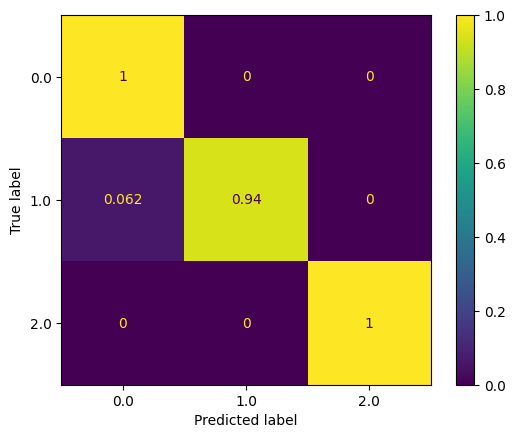

In [9]:
print("Decision tree: ", accuracy_score(y_test, dt_prediction))

cm = confusion_matrix(y_test, dt_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Gradient boosting:  0.9444444444444444


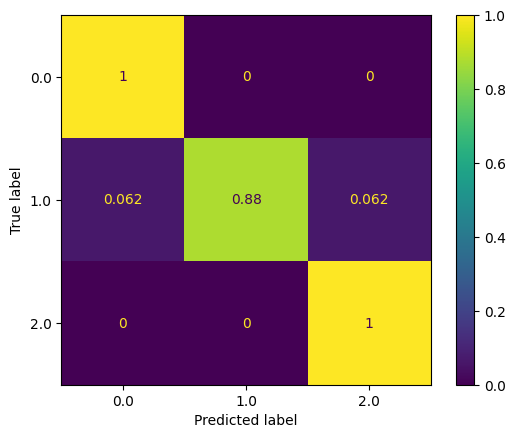

In [10]:
print("Gradient boosting: ", accuracy_score(y_test, gb_prediction))

cm = confusion_matrix(y_test, gb_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Для оценки качества решений были использованы метрики, подходящие для задач классификации: accuracy и confusion matrix. 

По итогам исследования можно сделать вывод, что обе модели имеют достаточно высокую, однако не идеальную точность: 0.92 для дерева решений и 0.94 для градиентного бустинга. 